<a href="https://colab.research.google.com/github/Andreagazy/PCVK-2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

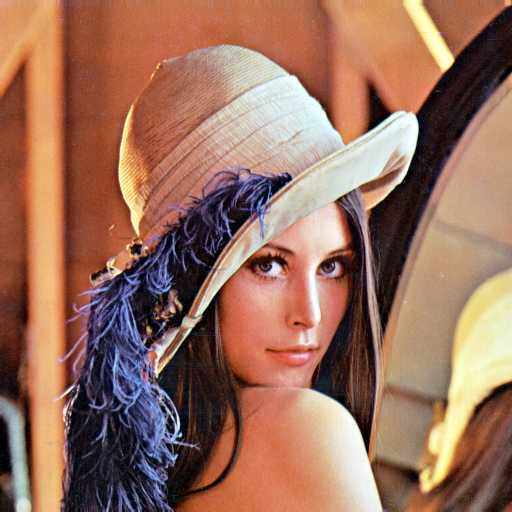

In [ ]:
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
cv2_imshow(image)

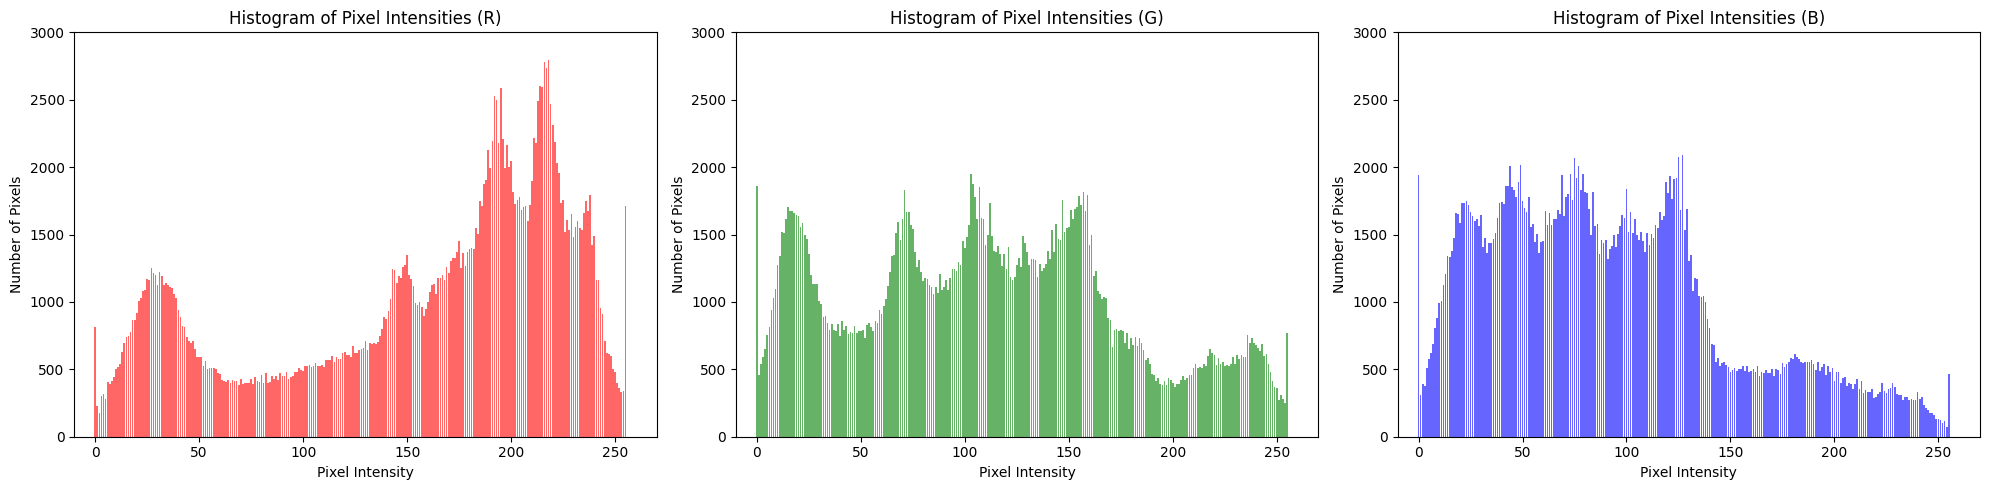

In [ ]:


# Initialize the color channels
colors = ('b', 'g', 'r')

# Create histograms as bar charts for each color channel
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Loop through the colors and plot the histograms
for i, color in enumerate(reversed(colors)):
    hist = cv.calcHist([image], [2-i], None, [256], [0, 256])
    axs[i].bar(range(256), hist.ravel(), color=color, alpha=0.6)  # Use bar chart
    axs[i].set_xlim([-10, 270])  # Corrected xlim
    axs[i].set_ylim([0, 3000])   # Corrected ylim
    axs[i].set_title(f'Histogram of Pixel Intensities ({color.upper()})')
    axs[i].set_xlabel('Pixel Intensity')
    axs[i].set_ylabel('Number of Pixels')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


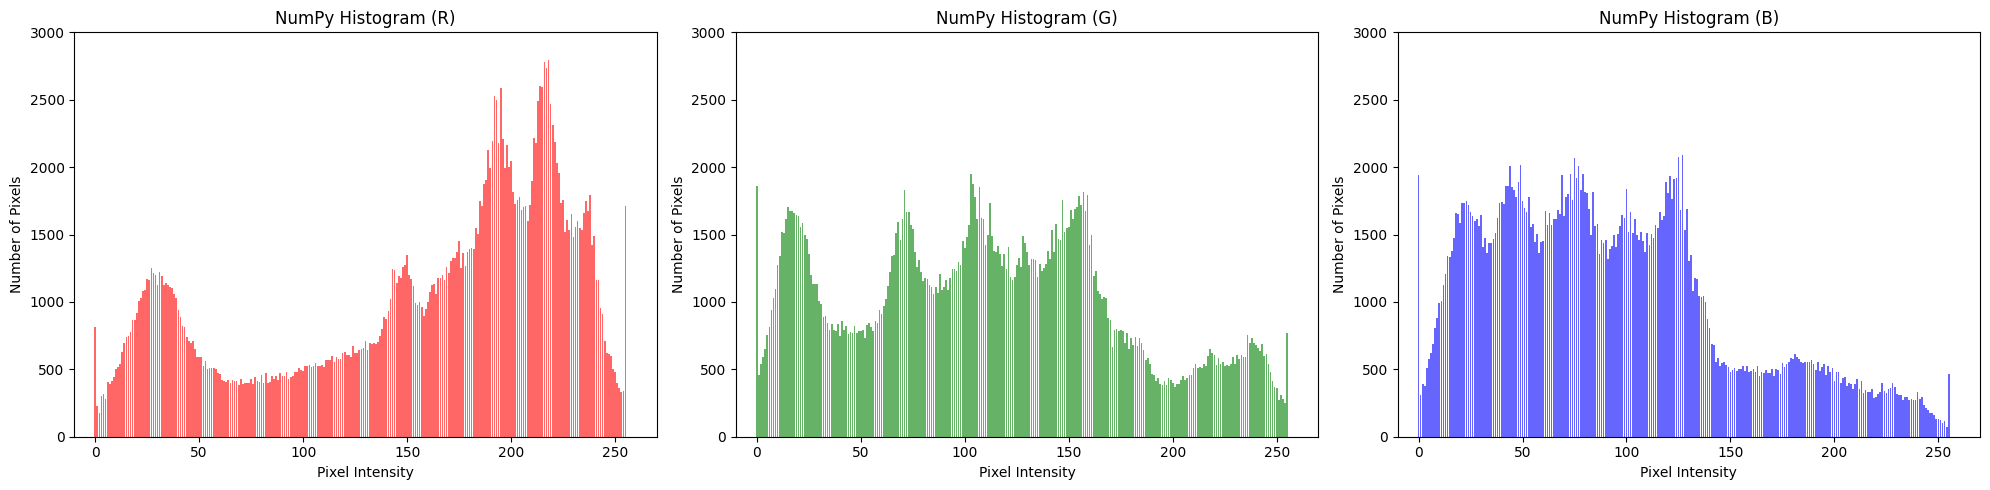

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# NumPy's histogram method
for i, color in enumerate(reversed(colors)):
    # Extract the individual channel
    channel = image[:, :, 2-i]

    # Compute the histogram using NumPy's histogram function
    hist, bins = np.histogram(channel.ravel(), bins=256, range=[0, 256])

    # Plot NumPy histogram
    axs[i].bar(range(256), hist, color=color, alpha=0.6)  # NumPy histogram
    axs[i].set_xlim([-10, 270])
    axs[i].set_ylim([0, 3000])
    axs[i].set_title(f'NumPy Histogram ({color.upper()})')
    axs[i].set_xlabel('Pixel Intensity')
    axs[i].set_ylabel('Number of Pixels')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

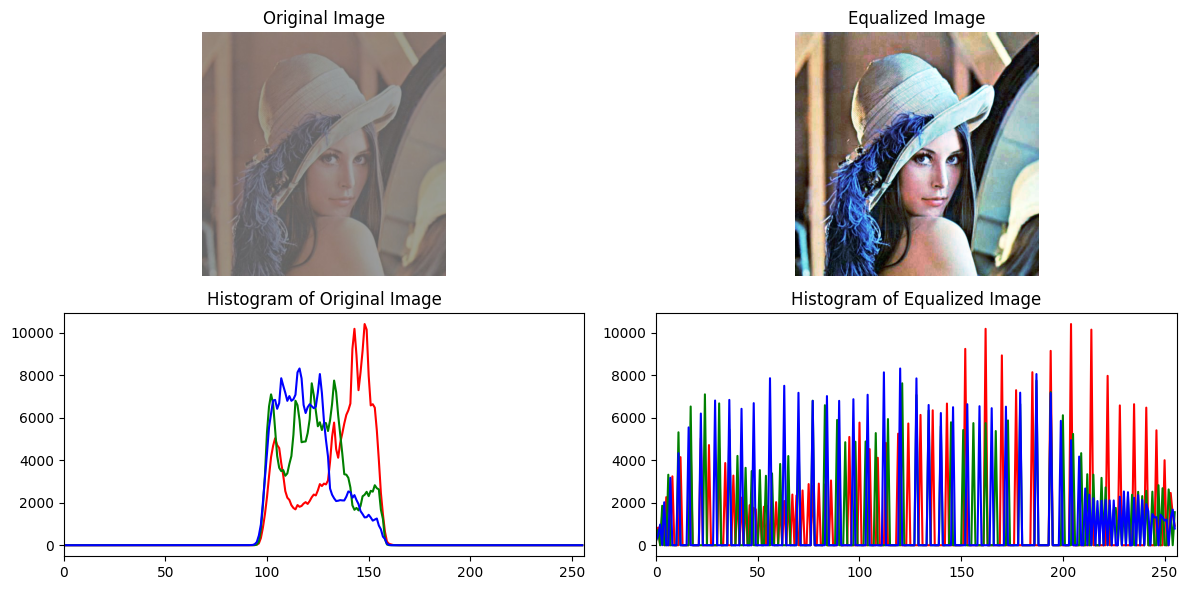

In [19]:
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

# Separate the color channels
b, g, r = cv.split(image)

# Perform histogram equalization on each channel
equalized_r = cv.equalizeHist(r)
equalized_g = cv.equalizeHist(g)
equalized_b = cv.equalizeHist(b)

# Merge the channels back
equalized_image = cv.merge((equalized_b, equalized_g, equalized_r))

# Convert back to RGB for displaying with matplotlib
equalized_image_rgb = cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB)
original_image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(2, 2, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis("off")

# Display equalized image
plt.subplot(2, 2, 2)
plt.imshow(equalized_image_rgb)
plt.title("Equalized Image")
plt.axis("off")

# Plot histograms for original image
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    histogram = cv.calcHist([original_image_rgb], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3)
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
    plt.title("Histogram of Original Image")

# Plot histograms for equalized image
for i, color in enumerate(colors):
    histogram = cv.calcHist([equalized_image_rgb], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 4)
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
    plt.title("Histogram of Equalized Image")

plt.tight_layout()
plt.show()